In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class KMeansClustering:

  def __init__(self, k=3):
    self.k = k
    self.centroids = None

  @staticmethod
  def euclidean_distance(data_point, centroids):
    return np.sqrt(np.sum((centroids - data_point)**2, axis=1))

  def fit(self, X, max_iterations=200):
    self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0),size=(self.k, X.shape[1]))
    for _ in range(max_iterations):
      y = []

      for data_point in X:
        distances = KMeansClustering.euclidean_distance(data_point, self.centroids)
        cluster_num = np.argmin(distances)
        y.append(cluster_num)

      y = np.array(y)

      cluster_indices = []

      for i in range(self.k):
        cluster_indices.append(np.argwhere(y == i))

      cluster_centers = []

      for i, indices in enumerate(cluster_indices):
        if len(indices) == 0:
          cluster_centers.append(self.centroidsd[i])
        else:
          cluster_centers.append(np.mean(X[indices], axis=0)[0])
      if np.max(self.centroids - np.array(cluster_centers)) < 0.0001:
        break
      else:
        self.centroids = np.array(cluster_centers)
    return y


In [21]:
random_points = np.random.randint(0, 100, (100, 2))

kmeans = KMeansClustering(k=3)
labels = kmeans.fit(random_points)

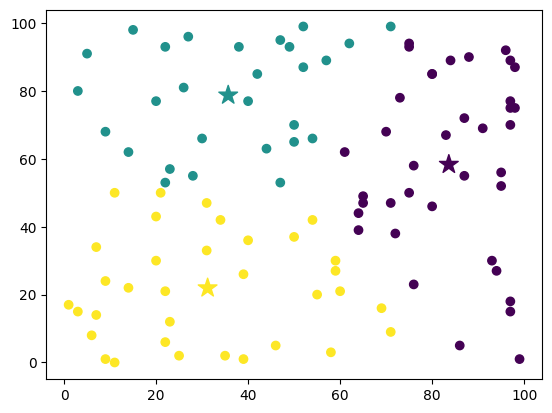

In [22]:
plt.scatter(random_points[:, 0], random_points[:, 1], c=labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c=range(len(kmeans.centroids)), marker="*", s=200)

plt.show()

In [32]:
from sklearn .datasets import make_blobs
from sklearn.metrics import adjusted_rand_score

In [43]:
data = make_blobs(n_samples=100, n_features=2, centers=3)
random_points = data[0]

kmeans= KMeansClustering(k=3)
labels = kmeans.fit(random_points)

In [44]:
print(data[1])
print(labels)

ari = adjusted_rand_score(data[1], labels)
print(ari)

[0 0 0 0 0 0 1 0 2 1 1 2 2 0 0 2 1 2 2 1 2 0 1 1 2 0 0 0 1 0 2 2 1 1 1 1 1
 0 2 2 2 1 2 2 2 2 1 1 0 0 2 2 0 2 1 1 2 0 2 2 2 0 0 1 2 1 0 1 0 1 0 0 1 0
 2 0 1 0 0 2 1 2 0 2 1 1 0 1 2 1 1 0 0 2 0 2 1 2 1 1]
[2 2 2 2 2 2 0 2 1 0 0 1 1 2 2 2 0 1 1 0 1 2 0 0 1 2 2 2 0 2 1 1 0 0 0 0 0
 2 1 1 1 0 1 1 1 1 0 0 2 1 2 1 2 2 0 0 1 2 1 1 1 1 2 0 2 0 2 0 2 0 2 0 0 2
 1 2 0 2 2 1 0 1 2 1 0 0 2 0 1 0 0 2 2 1 2 1 0 1 0 0]
0.8044926906578714


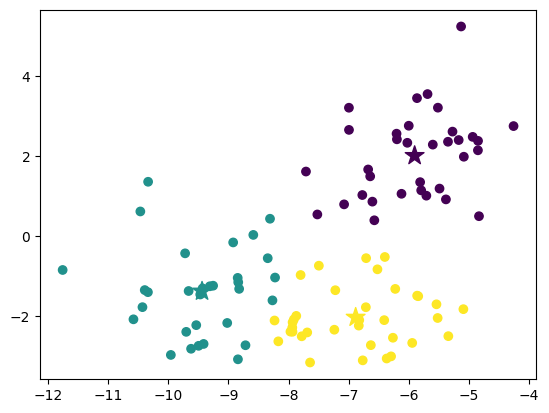

In [45]:
plt.scatter(random_points[:, 0], random_points[:, 1], c=labels)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c=range(len(kmeans.centroids)), marker="*", s=200)

plt.show()